# Trajectory Data Analysis

This notebook contains the code for our group's trajectory data analysis.

In [1]:
# dependencies

import time
import math
import heapq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
# data

cars_all = pd.read_csv('data/geolife-cars.csv')
cars_10 = pd.read_csv('data/geolife-cars-ten-percent.csv')
cars_30 = pd.read_csv('data/geolife-cars-thirty-percent.csv')
cars_60 = pd.read_csv('data/geolife-cars-sixty-percent.csv')

In [3]:
# constants

grid_size = 256
hub_grid_size = 50

euclid_dist = lambda a, b: sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

In [4]:
# change to one of [cars_10, cars_30, cars_60] to run on subsamples
dataset = cars_all

# Preprocessing

Assign each point to a grid-mesh.

In [5]:
%%time

# meshgrid

min_x, max_x = dataset.x.min(), dataset.x.max()
min_y, max_y = dataset.y.min(), dataset.y.max()

stride_x = (max_x - min_x) / grid_size
stride_y = (max_y - min_y) / grid_size

x_axis = np.linspace(min_x, max_x, hub_grid_size)
y_axis = np.linspace(min_y, max_y, hub_grid_size)

points = [(x, y) for x in x_axis for y in y_axis]

def get_grid(point):
    x = int((point[0] - min_x) // stride_x)
    y = int((point[1] - min_y) // stride_y)
    return (
        x if x < grid_size else x - 1,
        y if y < grid_size else y - 1
    )

# localize points

grid = {(i, j): set() for i in range(grid_size) for j in range(grid_size)}

for point in zip(dataset.x, dataset.y):
    grid[get_grid(point)].add(point)


CPU times: user 796 ms, sys: 50.3 ms, total: 847 ms
Wall time: 857 ms


# Density Function

The density function is defined as the number of points in a given radius `r`.

In [6]:
def density(point, hub_grid_size):
    px, py = get_grid(point)
    range_x = range_y = grid_size / hub_grid_size
    
    nearby_grids = [
        grid.get((i, j), set())
        for i in range(math.ceil(px - range_x/2), math.ceil(px + range_x/2 + 1))
        for j in range(math.ceil(py - range_y/2), math.ceil(py + range_y/2 + 1))
    ]
    
    neighbors = {p for g in nearby_grids for p in g}
    
    return len(neighbors) 

# Hub Function

The hub function uses a greedy algorithm to estimate the optimal k-partition of the `all_points` set. It simplifies the problem by instead finding hubs centered on each element in `all_points`.

In [7]:
def hubs(points, k, r):
    
    
    densities = [density(p, hub_grid_size) for p in tqdm(points)]
    ordered = [p for _, p in sorted(zip(densities, points), reverse=True)]
    
    hubs = set()
    for p in ordered:
        if all(euclid_dist(hub, p) > r for hub in hubs):
            hubs.add(p)
        
        if len(hubs) >= k: break
    
    return hubs

# Testing & Presentation


## Code Task One

  0%|          | 0/2500 [00:00<?, ?it/s]

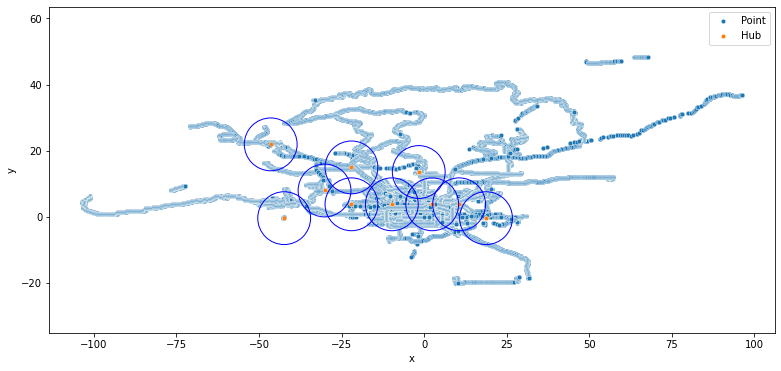

In [19]:
hub = hubs(points, 10, 8)

df_points = dataset[['x', 'y']]
df_hubs = pd.DataFrame(hub, columns=['x', 'y'])


plot = sns.scatterplot(data=df_points, x='x', y='y', label='Point', s = 20)
plot = sns.scatterplot(data=df_hubs, x='x', y='y', label='Hub', s = 20)

for x, y in hub:
    circle = plt.Circle(xy = (x, y), radius=8, color='b', fill=False)
    plot.add_patch(circle)
    
plot.axis('equal')

plt.rcParams['figure.figsize']=(13,6)

## Code Task Two

In [9]:
for k in [5, 10, 20, 40]:
    total_time = 0
    
    for _ in range(3):
        start_time = time.perf_counter()
        
        hub = hubs(points, k, 2)
        
        total_time += time.perf_counter() - start_time
    
    print(f'Avg runtime for k={k}: {total_time * 1000 / 3} milliseconds')

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=5: 225.1048123333336 milliseconds


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=10: 195.89576933333436 milliseconds


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=20: 217.59527400000067 milliseconds


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=40: 219.7451903333333 milliseconds


## Code Task Three

In [10]:
for kind, ds in zip(['10', '30', '60', 'all'], [cars_10, cars_30, cars_60, cars_all]):
    grid = {(i, j): set() for i in range(grid_size) for j in range(grid_size)}

    for point in zip(ds.x, ds.y):
        grid[get_grid(point)].add(point)
    
    
    start_time = time.perf_counter()

    hub = hubs(points, k, 2)

    total_time += time.perf_counter() - start_time
    
    print(f'Avg runtime for k={k}: {total_time * 1000 / 3} milliseconds')

  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=40: 246.49451366666617 milliseconds


  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=40: 282.82854033333274 milliseconds


  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=40: 332.52384699999976 milliseconds


  0%|          | 0/2500 [00:00<?, ?it/s]

Avg runtime for k=40: 406.9467369999996 milliseconds
